# Project: Investigate a Dataset (TMDb movie data )


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.
> - Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.
> - There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is.
> - The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
# Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv("tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.shape

(10866, 21)

Dataset concist of (10866) rows and (21) columns

In [4]:
# check if there are duplicated rows
df.duplicated().sum()

1

We have to remove duplicated in cleaning step

In [5]:
#review dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Data Cleaning


In [6]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# First remove duplicated 
df.drop_duplicates(inplace=True)
df.shape

(10865, 21)

Dataset bacame concist of (10866) rows and (21) columnsDataset concist of (10866) rows and (21) columns

In [7]:
# remove unnecessary columns
df.drop(["id","imdb_id","homepage","popularity","budget_adj","revenue_adj","keywords","overview"],axis=1,inplace=True)

In [8]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015


In [9]:
# change release_date
df.release_date = pd.to_datetime(df['release_date'])
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [10]:
# new column show us the profit  
df["profit"]=df["revenue"]- df["budget"]
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


We have to remove null values from budget and revenue which ( = 0 ) 

In [11]:
# remove null values from budget and revenue
mask=['budget', 'revenue']
df[mask] = df[mask].replace(0, np.NAN)
df.dropna(subset = mask, inplace = True)
df.shape

(3854, 14)

In [12]:
#change datadypes for  budget and revenue 
df['budget'] = df['budget'].astype(int)
df['revenue'] = df['revenue'].astype(int)
df.dtypes

budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
tagline                         object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
profit                           int64
dtype: object

<a id='eda'></a>
# Exploratory Data Analysis

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb2852f6128>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fb28498b048>]], dtype=object)

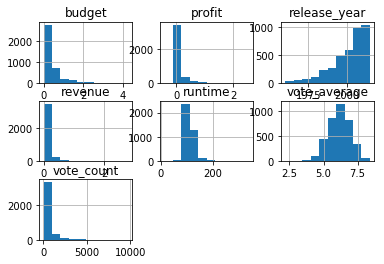

In [13]:
df.hist()

In [14]:
df.describe()

,budget,revenue,runtime,vote_count,vote_average,release_year,profit
count,3.854000e+03,3.854000e+03,3854.000000,3854.000000,3854.000000,3854.000000,3.854000e+03
mean,3.720370e+07,1.076866e+08,109.220291,527.720291,6.168163,2001.261028,7.048292e+07
std,4.220822e+07,1.765393e+08,19.922820,879.956821,0.794920,11.282575,1.506195e+08
min,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,-4.139124e+08
25%,1.000000e+07,1.360003e+07,95.000000,71.000000,5.700000,1995.000000,-1.321535e+06
50%,2.400000e+07,4.480000e+07,106.000000,204.000000,6.200000,2004.000000,2.002019e+07
75%,5.000000e+07,1.242125e+08,119.000000,580.000000,6.700000,2010.000000,8.170331e+07
max,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,2.544506e+09


In [15]:
#find the mean revenue
mean = df.revenue.mean()
mean

107686616.09807992

In [16]:
#devide df to two data frames ( high revenue and low revenue)
high_revenue = df.query('revenue > {}'.format(mean))
low_revenue = df.query('revenue <{}'.format(mean))
high_revenue.count(),low_revenue.count()

(budget                  1107
 revenue                 1107
 original_title          1107
 cast                    1107
 director                1107
 tagline                 1094
 runtime                 1107
 genres                  1107
 production_companies    1107
 release_date            1107
 vote_count              1107
 vote_average            1107
 release_year            1107
 profit                  1107
 dtype: int64, budget                  2747
 revenue                 2747
 original_title          2747
 cast                    2743
 director                2746
 tagline                 2480
 runtime                 2747
 genres                  2747
 production_companies    2701
 release_date            2747
 vote_count              2747
 vote_average            2747
 release_year            2747
 profit                  2747
 dtype: int64)

### Which genres are most popular from year to year? 

In [17]:
df.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


genres column contain more than one value separated by pipe (|) characters, we have to separate this values from each others

In [18]:
#build function to extract string from string from columns
def df_extract(data_frame,column):
    #will separate the column string by '|'
    df_extract = data_frame[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    df_extract = pd.Series(df_extract.split('|'))
    
    count_extract = df_extract.value_counts()
    
    return count_extract

In [19]:
# use df_extract function to extract genres from each other
df_extract(df,'genres')

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

In [20]:
new_genres = df_extract(df,'genres')

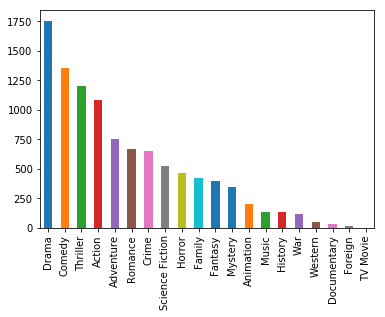

In [21]:
new_genres.plot(x="Genres", y="Count genres", kind="bar");

We noticed that most movies that genres is in ( Drama , Comedy , Thriller , Action , Adventure )

### What kinds of properties are associated with movies that have high revenues?

In [22]:
high_revenue.head()

,budget,revenue,original_title,cast,director,tagline,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354
2,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,185238201
3,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1868178225
4,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1316249360


In [23]:
df_extract(high_revenue,'genres')

Action             426
Comedy             393
Drama              375
Adventure          368
Thriller           322
Family             214
Science Fiction    196
Fantasy            191
Romance            174
Crime              157
Animation          122
Mystery             91
Horror              74
War                 41
Music               38
History             33
Western             16
Documentary          2
dtype: int64

it is the same note in the original dataset , that most movies that genres is in ( Drama , Comedy , Thriller , Action , Adventure )

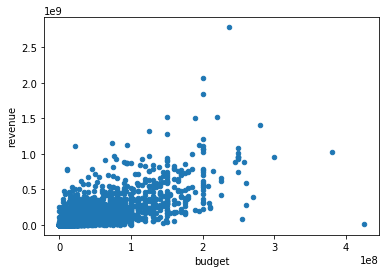

In [24]:
df.plot(x='budget', y='revenue', kind="scatter");

we noticed that it is not necessary that films that have high budget should have high revenue

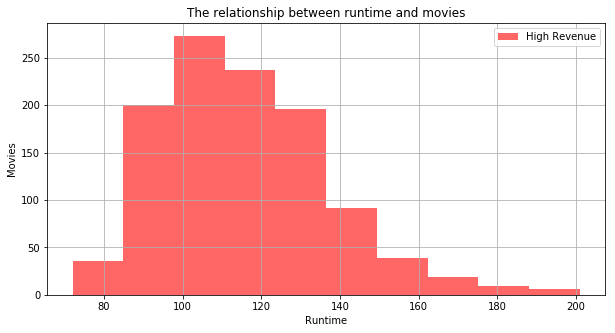

In [25]:
high_revenue.runtime.hist(figsize=(10,5),alpha=0.6,color="red",label="High Revenue");
plt.xlabel("Runtime")
plt.ylabel("Movies")
plt.title("The relationship between runtime and movies")
plt.legend();

We noticed that the movies that in between 100 and 120 minutes have high revenue

<a id='conclusions'></a>
## Conclusions
>- Most movies that genres is in ( Drama , Comedy , Thriller , Action , Adventure )
>- The movies that in between 100 and 120 minutes have high revenue

## Limitations
>- It is not necessary that films that have high budget should have high revenue

In [26]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate tmdb movie data.ipynb'])

0